<a href="https://colab.research.google.com/github/ImPrigoryunil/IT-2Lab/blob/main/%D0%9B%D0%A0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1
Для регрессионного анализа выберем факторы твердость по шкале Мооса (Hardness (Mohs)) и плотность (density_Average). Эти факторы могут быть связаны, так как плотность материала часто коррелирует с его механическими свойствами, включая твердость.

Зависимая переменная (Y): Hardness (Mohs)

Независимая переменная (X): density_Average


                            OLS Regression Results                            
Dep. Variable:        Hardness (Mohs)   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     6.322
Date:                Mon, 09 Jun 2025   Prob (F-statistic):             0.0153
Time:                        10:20:31   Log-Likelihood:                -87.845
No. Observations:                  50   AIC:                             179.7
Df Residuals:                      48   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3777      0.398     

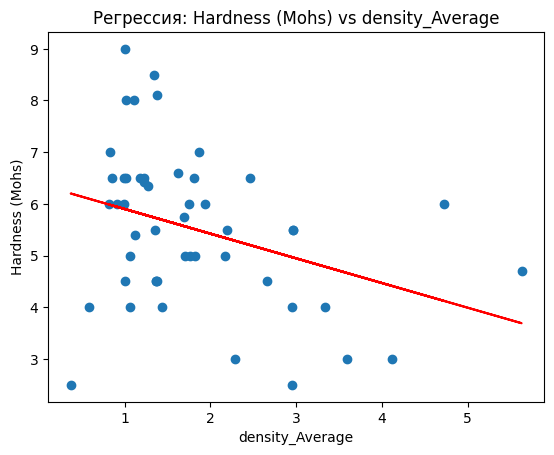

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('Artificial_Crystals_Dataset.csv')

# Удаление строк с нулевыми значениями
data = data[(data['density_Average'] != 0) & (data['Hardness (Mohs)'] != 0)]

# Подготовка данных
X = data['density_Average']
Y = data['Hardness (Mohs)']
X = sm.add_constant(X)  # Добавление константы для intercept

# Построение модели
model = sm.OLS(Y, X).fit()
print(model.summary())

# Визуализация
plt.scatter(data['density_Average'], data['Hardness (Mohs)'])
plt.plot(data['density_Average'], model.predict(X), color='red')
plt.xlabel('density_Average')
plt.ylabel('Hardness (Mohs)')
plt.title('Регрессия: Hardness (Mohs) vs density_Average')
plt.show()

### Задание 2
Зависимая переменная: твердость по шкале Мооса (Hardness (Mohs)).

Все числовые колонки, кроме Formula, Crystal structure и Hardness (Mohs). Категориальные колонки отбрасываем.



In [3]:
# Подготовка данных
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(['Hardness (Mohs)'])
X = data[numerical_columns]
X = sm.add_constant(X)  # Добавление константы
Y = data['Hardness (Mohs)']

# Построение полной модели
full_model = sm.OLS(Y, X).fit()
print(full_model.summary())

# Удаление незначимых факторов (p > 0.05)
significant_columns = numerical_columns[full_model.pvalues[1:] < 0.05]
X_sig = data[significant_columns]
X_sig = sm.add_constant(X_sig)
reduced_model = sm.OLS(Y, X_sig).fit()
print(reduced_model.summary())

# Сравнение моделей по AIC и BIC
print("AIC полной модели:", full_model.aic)
print("AIC сокращенной модели:", reduced_model.aic)
print("BIC полной модели:", full_model.bic)
print("BIC сокращенной модели:", reduced_model.bic)

                            OLS Regression Results                            
Dep. Variable:        Hardness (Mohs)   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     3.745
Date:                Mon, 09 Jun 2025   Prob (F-statistic):           0.000962
Time:                        10:25:58   Log-Likelihood:                -71.063
No. Observations:                  50   AIC:                             168.1
Df Residuals:                      37   BIC:                             193.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.77

Модель с меньшими значениями AIC/BIC предпочтительнее. Таким образом, полная моделть более предпочтительна.


### Задание 3

Для кластеризации выберем Hardness (Mohs) и density_Total, так как они могут отражать свойства кристаллов.

Используем метод K-средних. Число кластеров определим с помощью метода Elbow Method.

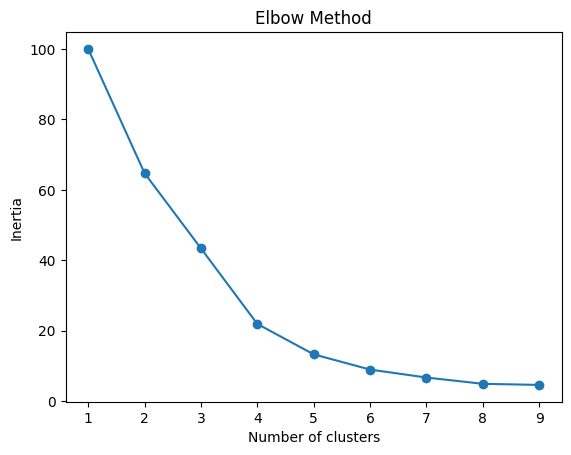

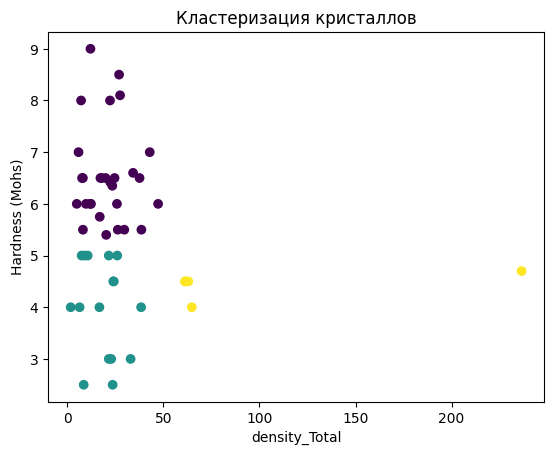

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Подготовка данных
X_cluster = data[['Hardness (Mohs)', 'density_Total']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Определение числа кластеров
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Кластеризация с выбранным числом кластеров
k = 3
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Визуализация кластеров
plt.scatter(data['density_Total'], data['Hardness (Mohs)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('density_Total')
plt.ylabel('Hardness (Mohs)')
plt.title('Кластеризация кристаллов')
plt.show()

Для регрессии по двум факторам выбраны Hardness (Mohs) и density_Total. Построена и оценена линейная модель.

Для множественной регрессии выбрана Hardness (Mohs) как зависимая переменная. Построена и упрощена модель, удалены незначимые факторы.

Для кластеризации выбраны Hardness (Mohs) и density_Total. Определено число кластеров и проведена визуализация.
